## Artifacts by project
NOTE: Please insert the password in order to access to the database

In [2]:
import getpass

password = getpass.getpass('Enter password for the mongodb database:')

Enter your password········


asdfasdfsaf


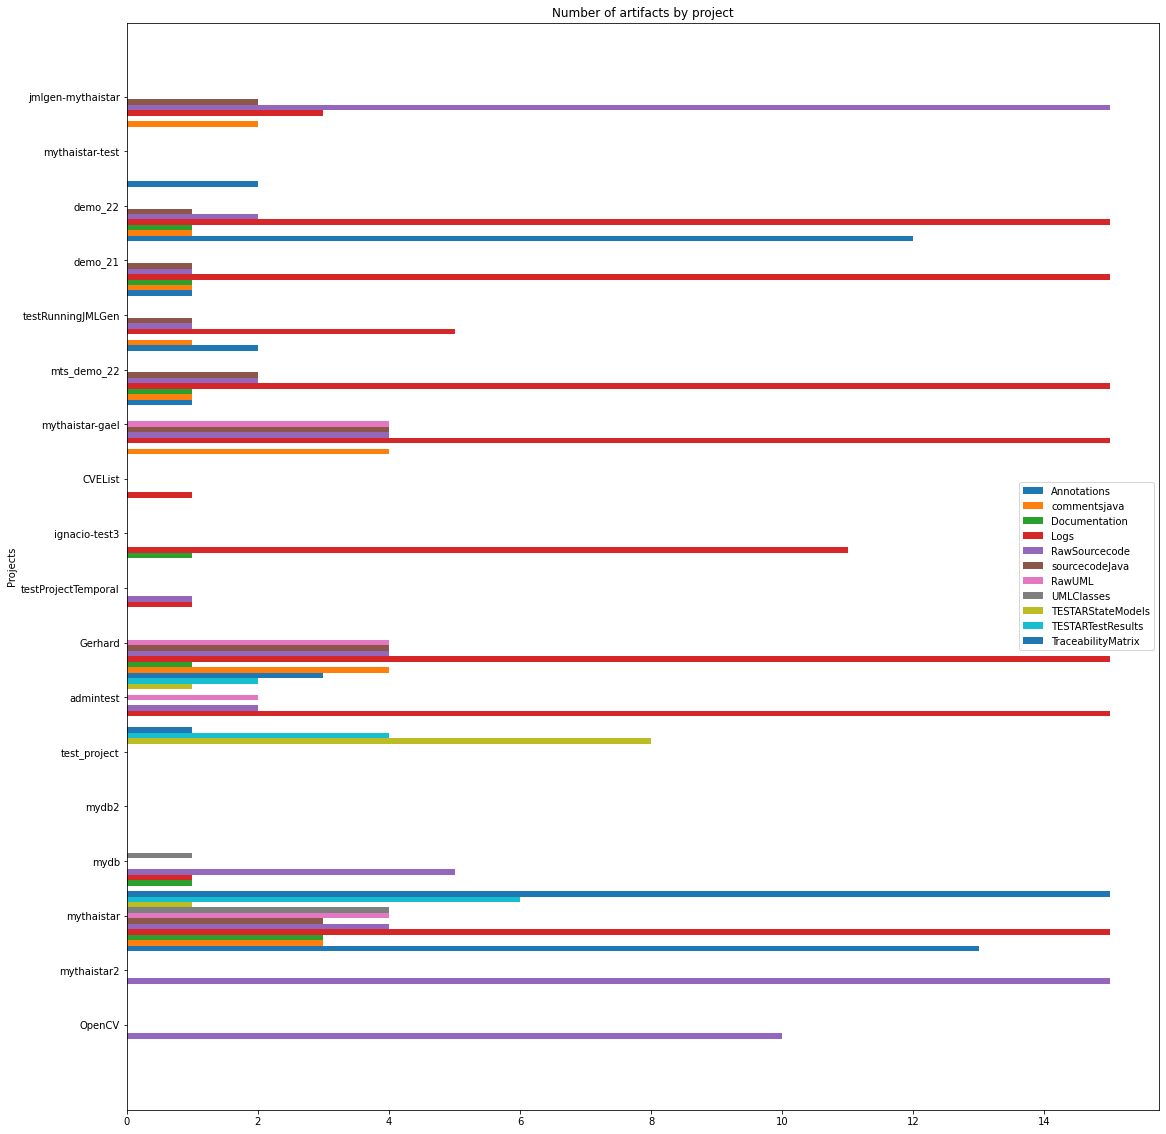

In [3]:
from pymongo import MongoClient
from decoderpkm import GetConn, GetConf
from IPython.display import HTML, display
import pymongo
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np

client = GetConn(password)

db = client['pkm']

projects = db.Projects

projectNames = []

collectionNames = [ 'Annotations', 'commentsjava', 'Documentation', 'Logs',
                    'RawSourcecode', 'sourcecodeJava', 'RawUML', 'UMLClasses', 
                    'TESTARStateModels', 'TESTARTestResults', 'TraceabilityMatrix']

collectionLabels = ['Annotations', 'Java Comments', 'Documentation', 'Log files',
                    'Raw Source Code', 'Java Source', 'Raw UML Diagramas', 'UML Classes',
                    'Testar Test Results', 'Testar State Models', 'Traceability Matrix']

counts = []

for i in collectionNames:
    counts.append([])

for project in projects.find({}):
    projectNames.append(project['name'])
    
    i = 0
    for col in collectionNames:
        # count for collection col in project project['name']
        count = client[project['name']][col].count_documents({})
        counts[i].append(count)
        i = i + 1
    
x = np.arange(0, len(projectNames)*10, 10)

def normalize(n):
    ret = n
    if (ret > 15):
        ret = 15
    return ret

width = 1  # the width of the bars
fig, ax = plt.subplots()

i = 0

for colName in collectionNames:
    countArray = list(map( normalize, counts[i] ))

    factor = (len(collectionNames) // (-2)) + i
    ax.barh(x + width * factor, countArray, height=width, label=colName)

#     if (i == 0):
#         ax.barh(x, countArray, height=width, label=colName)
#     else:
#         ax.barh(x, countArray, height=width, bottom=counts[i-1], label=colName)
    i = i + 1


# para hacer barras en la misma columna o fila
# p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
# p2 = ax.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd, label='Women')

# testarTestsBar = ax.barh(x - width * 5, testarTestCounts, height=width, label='Testar Test Results')
# testarStateBar = ax.barh(x - width * 4, testarStateCounts, height=width, label='Testar State Models')
# commentsBar = ax.barh(x - width * 3, commentCounts, height=width, label='Comments')
# annotationsBar = ax.barh(x - width * 2, annotationCounts, height=width, label='Annotations')
# documentsBar = ax.barh(x - width * 1, documentCounts, height=width, label='Documentation')
# logsBar = ax.barh(x + width * 0, logCounts, height=width, label='Log files / 100')
# codeBar = ax.barh(x + width * 1, codeCounts, height=width, label='Raw Source Code / 100')
# sourceJavaBar = ax.barh(x + width * 2, sourceCodeJavaCounts, height=width, label='Java Source')
# umlBar = ax.barh(x + width * 3, umlCounts, height=width, label='UML Diagramas')
# umlClassesBar = ax.barh(x + width * 4, umlClassesCounts, height=width, label='UML Classes')
# traceMatrixBar = ax.barh(x + width * 5, traceMatrixCounts, height=width, label='Traceability Matrix / 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Projects')
ax.set_title('Number of artifacts by project')
ax.set_yticks(x)
ax.set_yticklabels(projectNames)
ax.legend()

# number value on the top of the bar:
#ax.bar_label(commentsBar)
#ax.bar_label(annotationsBar)

fig.set_size_inches(18.5, 20)

plt.show()
